In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
import scipy.stats
from sklearn.metrics import explained_variance_score

In [2]:
true_mean = np.zeros((5,20,1)) #
true = np.zeros((5,20,50000)) #

na_true = np.zeros((5,20,50000)) #

nona_true_mean = np.zeros((3,20,1)) #
nona_true = np.zeros((3,20,50000)) #

glm1 = np.zeros((5,20,50000)) #
glm2 = np.zeros((5,20,50000)) #
gru = np.zeros((5,20,50000)) #

na_glm = np.zeros((5,20,50000)) #
na_gru = np.zeros((5,20,50000)) #
nona_glm = np.zeros((3,20,50000)) #
nona_gru = np.zeros((3,20,50000)) #

na_comp_var_exp_raw = np.zeros((5,3,20,50000))
nona_comp_var_exp_raw = np.zeros((3,3,20,50000))

for x in range(2):
    for y in range(2):
        if (x == 0) & (y==0):
            na_nmda_label = "gN0.6_Ni200_gG0.1_gB0.06_NA0.75_NMDA0.75"
            save_label = "NA0.75_NMDA0.75"
        if (x == 0) & (y==1):
            na_nmda_label = "gN1.2_Ni200_gG0.1_gB0.23_NA0.75_NMDA1.5"
            save_label = "NA0.75_NMDA1.5"
        if (x == 1) & (y==0):
            na_nmda_label = "gN0.6_Ni200_gG0.1_gB0.06_NA1.5_NMDA0.75"
            save_label = "NA1.5_NMDA0.75"
        if (x == 1) & (y==1):
            na_nmda_label = "gN1.2_Ni200_gG0.1_gB0.23_NA1.5_NMDA1.5"
            save_label = "NA1.5_NMDA1.5"
            
        true_mean[x*2+y+1] = np.mean(np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_"+na_nmda_label+"_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
        true[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_"+na_nmda_label+"_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
        na_true[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/data/V_diff_"+str(save_label)+"_stimseed1.npy")[-20*50000:].reshape(20,50000)
        
        glm1[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/glm_s5_h1_output.npz")["test"]
        glm2[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/glm_s5_h2_output.npz")["test"]
        gru[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/gru_s5_h20_output.npz")["test"]
        
        na_gru[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/na_gru_s5_h20_output.npz")["test"]
        na_glm[x*2+y+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/na_glm_s1_h1_output.npz")["test"]
        
        na_comp_var_exp_raw[x*2+y+1,0] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/na_glm_s5_h1_output.npz")["test"]
        na_comp_var_exp_raw[x*2+y+1,1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/na_glm_s5_h2_output.npz")["test"]
        na_comp_var_exp_raw[x*2+y+1,2] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/na_gru_s5_h20_output.npz")["test"]
        
true_mean[0] = np.mean(np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true[0] = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
na_true[0] = np.load("/scratch/yjk27/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-50000*20:].reshape(20,50000)
glm1[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/glm_s10_h1_output.npz")["test"]
glm2[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/glm_s10_h2_output.npz")["test"]
gru[0] = np.load("/scratch/yjk27/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"]
na_gru[0] = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
na_glm[0] = np.load("/scratch/yjk27/CA1_clust4-60/global/glm_s1_h1_output.npz")["test"]

na_comp_var_exp_raw[0,0] = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h1_output.npz")["test"]
na_comp_var_exp_raw[0,1] = np.load("/scratch/yjk27/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
na_comp_var_exp_raw[0,2] = np.load("/scratch/yjk27/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
    
for x in range(2):
    if x == 0:
        na_nmda_label = "gN0.6_Ni200_gG0.1_gB0.06_NA0_NMDA0.75"
        save_label = "NA0_NMDA0.75"
    elif x == 1:
        na_nmda_label = "gN1.2_Ni200_gG0.1_gB0.23_NA0_NMDA1.5"
        save_label = "NA0_NMDA1.5"
        
    nona_true_mean[x+1] = np.mean(np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_"+na_nmda_label+"_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
    nona_true[x+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_"+na_nmda_label+"_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
    
    nona_gru[x+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/gru_s5_h20_output.npz")["test"]
    nona_glm[x+1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/glm_s1_h1_output.npz")["test"]
    
    nona_comp_var_exp_raw[x+1,0] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/glm_s5_h1_output.npz")["test"]
    nona_comp_var_exp_raw[x+1,1] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/glm_s5_h2_output.npz")["test"]
    nona_comp_var_exp_raw[x+1,2] = np.load("/scratch/yjk27/CA1_NA_NMDA/"+save_label+"/gru_s5_h20_output.npz")["test"]
        
    
nona_true_mean[0] = np.mean(np.load("/scratch/yjk27/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
nona_true[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
nona_gru[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
nona_glm[0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/global/gru_s1_h20_output.npz")["test"]

nona_comp_var_exp_raw[0,0] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/glm_s10_h1_output.npz")["test"]
nona_comp_var_exp_raw[0,1] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/glm_s10_h2_output.npz")["test"]
nona_comp_var_exp_raw[0,2] = np.load("/scratch/yjk27/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
    
glm1 += true_mean
glm2 += true_mean
gru += true_mean

nona_glm += nona_true_mean
nona_gru += nona_true_mean
soma_errors = true - gru

In [3]:
soma_var_exp = np.zeros((5,3,20))
na_var_exp = np.zeros((5,2,20))
nona_var_exp = np.zeros((3,2,20))
na_comp_var_exp = np.zeros((5,3,20))
nona_comp_var_exp = np.zeros((3,3,20))

for x in range(5):
    for i in range(20):
        soma_var_exp[x,0,i] = explained_variance_score(true[x,i], glm1[x,i])
        soma_var_exp[x,1,i] = explained_variance_score(true[x,i], glm2[x,i])
        soma_var_exp[x,2,i] = explained_variance_score(true[x,i], gru[x,i])
        
        na_var_exp[x,0,i] = explained_variance_score(na_true[x,i], na_glm[x,i])
        na_var_exp[x,1,i] = explained_variance_score(na_true[x,i], na_gru[x,i])
        
        na_comp_var_exp[x,0,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,0,i])
        na_comp_var_exp[x,1,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,1,i])
        na_comp_var_exp[x,2,i] = explained_variance_score(na_true[x,i], na_comp_var_exp_raw[x,2,i])
        
for x in range(3):
    for i in range(20):
        nona_var_exp[x,0,i] = explained_variance_score(nona_true[x,i], nona_glm[x,i])
        nona_var_exp[x,1,i] = explained_variance_score(nona_true[x,i], nona_gru[x,i])
        
        nona_comp_var_exp[x,0,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,0,i])
        nona_comp_var_exp[x,1,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,1,i])
        nona_comp_var_exp[x,2,i] = explained_variance_score(nona_true[x,i], nona_comp_var_exp_raw[x,2,i])
        
bin_no = 40
error_diff = np.zeros((5,bin_no,bin_no))
diff_bins = np.zeros((5,bin_no+1))
error_bins = np.zeros((5,bin_no+1))
for i in range(5):        
    error_diff_, diff_bins_, error_bins_ = np.histogram2d(na_true[i].flatten(), soma_errors[i].flatten(), bins=bin_no)
    error_diff[i] = error_diff_
    diff_bins[i] = diff_bins_
    error_bins[i] = error_bins_

<ipython-input-8-797c028f5a33>:208: RuntimeWarning: divide by zero encountered in log10
  img = ax_i.imshow(np.flipud(np.log10(error_diff[i]).T), extent=[diff_bins[i,0], diff_bins[i,-1], error_bins[i,0], error_bins[i,-1]], cmap="jet")
<ipython-input-8-797c028f5a33>:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


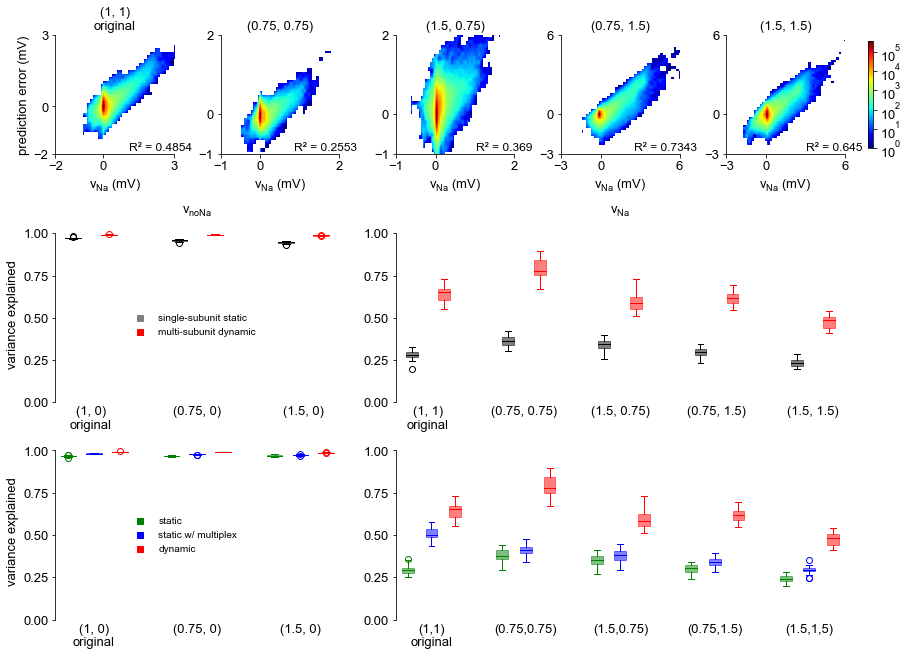

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (12.5,9))
gs = fig.add_gridspec(3,15, wspace=1.25, hspace=1)
#ax1 = fig.add_subplot(gs[0,:4])
ax21 = fig.add_subplot(gs[0,:3])
ax22 = fig.add_subplot(gs[0,3:6])
ax23 = fig.add_subplot(gs[0,6:9])
ax24 = fig.add_subplot(gs[0,9:12])
ax25 = fig.add_subplot(gs[0,12:])
ax3 = fig.add_subplot(gs[1,6:])
ax4 = fig.add_subplot(gs[1,:6])
ax5 = fig.add_subplot(gs[2,6:])
ax6 = fig.add_subplot(gs[2,:6])

colors = ["green", "blue", "red"] * 5
cap_colors = ["green", "green", "blue", "blue", "red", "red"] * 5
"""
bp = ax1.boxplot(soma_var_exp.reshape((-1,20)).T,
                 positions = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19], widths = 0.6, patch_artist=True)
for i in range(soma_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(soma_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax1.set_ylim(0,1)
ax1.set_xticks([2,6,10,14,18])
ax1.tick_params(axis="x", length=0)
ax1.set_xticklabels(["$\mathregular{v_{soma}}$", "NA=0.75\nNMDA=0.75", "NA=0.75\nNMDA=1.5",
                     "NA=1.5\nNMDA=0.75", "NA=1.5\nNMDA=1.5"], fontsize=10, rotation=30)
ax1.set_ylabel("variance explained")
ax1.margins(x=0.005, y=0.005)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.set_title("$\mathregular{v_{soma}}$", fontsize=13)
ax1.set_ylim(0,1.05)
ax1.set_yticks(np.arange(0,1.01,0.25))
ax1.spines["left"].set_bounds((0,1))

hR = ax1.scatter(1,1,c='red', marker="s")
hB = ax1.scatter(1,1,c='blue', marker="s")
hG = ax1.scatter(1,1,c='green', marker="s")
ax1.legend((hG, hB, hR),('static', 'static w/ multiplex', 'dynamic'), frameon=False, loc=(0.25,0.3), fontsize=10)
hG.set_visible(False)
hR.set_visible(False)
hB.set_visible(False)
"""

#### NA NOONA COMPARISON #####

colors = ["green", "blue", "red"] * 5
cap_colors = ["green", "green", "blue", "blue", "red", "red"] * 5

bp = ax5.boxplot(na_comp_var_exp.reshape(-1,20).T, positions = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],
                 widths = 0.5, patch_artist=True)
for i in range(15):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(15*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax5.set_ylim(0,1)
ax5.set_xticks([2,6,10,14,18])
ax5.tick_params(axis="x", length=0)
#ax5.set_xticklabels(["(0.3 S/cm2\n0.8 nS)\n(original)", "0.225 S/cm2\n0.6 nS", "0.225 S/cm2\n1.2 nS",
                     #"0.45 S/cm2\n0.6 nS", "0.45 S/cm2\n1.2 nS"])
ax5.set_xticklabels(["(1,1)\noriginal", "(0.75,0.75)", "(1.5,0.75)",
                     "(0.75,1.5)", "(1.5,1,5)"])
ax5.margins(x=0.005, y=0.005)
ax5.spines["right"].set_visible(False)
ax5.spines["top"].set_visible(False)
ax5.spines["bottom"].set_visible(False)
#ax5.set_title("$\mathregular{v_{Na}}$", fontsize=13)
ax5.set_ylim(0,1.05)
ax5.set_yticks(np.arange(0,1.01,0.25))
ax5.spines["left"].set_bounds((0,1))


bp = ax6.boxplot(nona_comp_var_exp.reshape(-1,20).T, positions = [1,2,3,5,6,7,9,10,11],
                 widths = 0.6, patch_artist=True)
for i in range(9):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(9*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])


hR = ax6.scatter(1,1,c='red', marker="s")
hB = ax6.scatter(1,1,c='blue', marker="s")
hG = ax6.scatter(1,1,c='green', marker="s")
ax6.legend((hG, hB, hR),('static', 'static w/ multiplex', 'dynamic'), frameon=False, loc=(0.25,0.35), fontsize=10)
hG.set_visible(False)
hR.set_visible(False)
hB.set_visible(False)
    
ax6.set_ylim(0,1)
ax6.set_xticks([2,6,10])
ax6.tick_params(axis="x", length=0)
#ax6.set_xticklabels(["0 S/cm2\n0.8 nS\n(original)", "0 S/cm2\n0.6 nS",
                     #"0 S/cm2\n1.2 nS"])
ax6.set_xticklabels(["(1, 0)\noriginal", "(0.75, 0)", "(1.5, 0)"])
ax6.margins(x=0.005, y=0.005)
ax6.set_ylabel("variance explained")
ax6.spines["right"].set_visible(False)
ax6.spines["top"].set_visible(False)
ax6.spines["bottom"].set_visible(False)
#ax6.set_title("$\mathregular{v_{noNa}}$", fontsize=13)
ax6.set_ylim(0,1.05)
ax6.set_yticks(np.arange(0,1.01,0.25))
ax6.spines["left"].set_bounds((0,1))
    
#################

colors = ["black", "red"] * 5
cap_colors = ["black", "black", "red", "red"] * 5

bp = ax3.boxplot(na_var_exp.reshape((-1,20)).T,
                 positions = [1,2,4,5,7,8,10,11,13,14], widths = 0.37, patch_artist=True)
for i in range(na_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(na_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax3.set_ylim(0,1)
ax3.set_xticks([1.5,4.5,7.5,10.5,13.5])
ax3.tick_params(axis="x", length=0)
#ax3.set_xticklabels(["0.3 S/cm2\n0.8 nS\n(original)", "0.225 S/cm2\n0.6 nS", "0.225 S/cm2\n1.2 nS",
                     #"0.45 S/cm2\n0.6 nS", "0.45 S/cm2\n1.2 nS"])
ax3.set_xticklabels(["(1, 1)\noriginal", "(0.75, 0.75)", "(1.5, 0.75)",
                     "(0.75, 1.5)", "(1.5, 1.5)"])
ax3.margins(x=0.005, y=0.005)
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.set_title("$\mathregular{v_{Na}}$", fontsize=13, pad=12)
ax3.set_ylim(0,1.05)
ax3.set_yticks(np.arange(0,1.01,0.25))
ax3.spines["left"].set_bounds((0,1))

bp = ax4.boxplot(nona_var_exp.reshape((-1,20)).T, positions = [1,2,4,5,7,8], widths = 0.45, patch_artist=True)
for i in range(nona_var_exp.reshape((-1,20)).shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(nona_var_exp.reshape((-1,20)).shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
hR = ax4.scatter(1,1,c='red', marker="s")
hG = ax4.scatter(1,1,c='gray', marker="s")
ax4.legend((hG, hR),('single-subunit static', 'multi-subunit dynamic'), frameon=False, loc=(0.25,0.35),
          fontsize=10)
hG.set_visible(False)
hR.set_visible(False)
    
ax4.set_ylim(0,1)
ax4.set_xticks([1.5,4.5,7.5])
ax4.tick_params(axis="x", length=0)
#ax4.set_xticklabels(["0 S/cm2\n0.8 nS\n(original)", "0 S/cm2\n0.6 nS",
                     #"0 S/cm2\n1.2 nS"])
ax4.set_xticklabels(["(1, 0)\noriginal", "(0.75, 0)", "(1.5, 0)"])
ax4.margins(x=0.005, y=0.005)
ax4.set_ylabel("variance explained")
ax4.spines["right"].set_visible(False)
ax4.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.set_title("$\mathregular{v_{noNa}}$", fontsize=13, pad=12)
ax4.set_ylim(0,1.05)
ax4.set_yticks(np.arange(0,1.01,0.25))
ax4.spines["left"].set_bounds((0,1))

########################
ax_list = [ax21, ax22, ax23, ax24, ax25]
#title_list = ["0.3 S/cm2\n0.8 nS\n(original)", "0.225 S/cm2\n0.6 nS", "0.225 S/cm2\n1.2 nS",
                     #"0.45 S/cm2\n0.6 nS", "0.45 S/cm2\n1.2 nS"]
title_list = ["(1, 1)\noriginal", "(0.75, 0.75)", "(1.5, 0.75)",
                     "(0.75, 1.5)", "(1.5, 1.5)"]
#title_pad_list = [10, 20, 20, 10, 10]
#x_pad_list = [6, 6, 6, 0, 0]

for i in range(5):
    ax_i = ax_list[i]

    img = ax_i.imshow(np.flipud(np.log10(error_diff[i]).T), extent=[diff_bins[i,0], diff_bins[i,-1], error_bins[i,0], error_bins[i,-1]], cmap="jet")
    coeff = np.corrcoef(na_true[i].flatten(), soma_errors[i].flatten())[0][1]
    #ax10.set_title("8 clusters")
    ax_i.set_xlabel("$\mathregular{v_{Na}}$ (mV)")
    if i == 0:
        ax_i.set_ylabel("prediction error (mV)")
    ax_i.spines["right"].set_visible(False)
    ax_i.spines["top"].set_visible(False)
    if i == 0:
        ax_i.set_xticks(np.arange(-2,3.01,1))
        ax_i.set_yticks(np.arange(-2,3.01,1))
        ax_i.set_xlim(-2,3)
        ax_i.set_ylim(-2,3)
        ax_i.set_xticks([-2,0,3])
        ax_i.set_yticks([-2,0,3])
    elif i == 1:
        ax_i.set_xticks(np.arange(-1,2.1,1))
        ax_i.set_yticks(np.arange(-1,2.1,1))
        ax_i.set_xlim(-1,2)
        ax_i.set_ylim(-1,2)
        ax_i.set_xticks([-1,0,2])
        ax_i.set_yticks([-1,0,2])
    elif i == 2:
        ax_i.set_xticks(np.arange(-1,2.1,1))
        ax_i.set_yticks(np.arange(-1,2.1,1))
        ax_i.set_xlim(-1,2)
        ax_i.set_ylim(-1,2)
        ax_i.set_xticks([-1,0,2])
        ax_i.set_yticks([-1,0,2])
    elif i == 3:
        ax_i.set_xticks(np.arange(-3,6.1,1))
        ax_i.set_yticks(np.arange(-3,6.1,1))
        ax_i.set_xlim(-3,6)
        ax_i.set_ylim(-3,6)
        ax_i.set_xticks([-3,0,6])
        ax_i.set_yticks([-3,0,6])
    elif i == 4:
        ax_i.set_xticks(np.arange(-3,6.1,1))
        ax_i.set_yticks(np.arange(-3,6.1,1))
        ax_i.set_xlim(-3,6)
        ax_i.set_ylim(-3,6)
        ax_i.set_xticks([-3,0,6])
        ax_i.set_yticks([-3,0,6])
    ax_i.set_aspect(1)
    ax_i.annotate("R² = "+str(np.round(coeff,4)), xy=(1.15,0.1),  xycoords='axes fraction',
                size=12, ha='right', va='top')
    ax_i.set_title(title_list[i], fontsize=13)

cbar = fig.colorbar(img, ax=[ax21,ax22,ax23,ax24,ax25], shrink=0.6, pad=0, fraction=0.01, ticks=[0,1,2,3,4,5,6])
cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$",
                        "$\mathregular{10^6}$"])
    
fig.tight_layout()
#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_na_nmda/fig_na_nmda_raw.pdf", bbox_inches="tight", transparent=True)